In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Import the handwritten digits dataset from keras
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [4]:
print(len(X_train))
# So we have 60,000 handwritten digits in the training data

print(len(X_test))
# And 10,000 handwritten digits in the testing data

60000
10000


In [5]:
X_train[0]
# this gives a 2D array (28x28) with values from 0 to 255, where 0 representing black and 255 representing white.

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

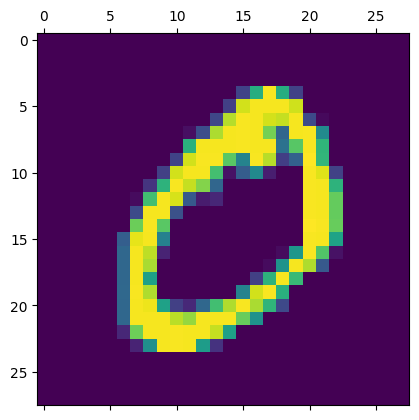

In [6]:
plt.matshow(X_train[1])

In [7]:
# we scale the dataset inorder to make the data more robust and the model can generate high accuracy scores.
X_train = X_train/255
X_test = X_test/255

In [8]:
# we need to flatten the data as we have to convert the 28x28 grid into a 1D array that contains 784 elements.
# to do this, we use the reshape() method provided by the pandas library
X_train_flattened = X_train.reshape(len(X_train), 28*28)

In [9]:
X_train_flattened.shape

(60000, 784)

In [10]:
# Similarly, we flatten the X_test data
X_test_flatten = X_test.reshape(len(X_test), 28*28)
X_test_flatten.shape

(10000, 784)

In [11]:
X_train_flattened[0]
# the data is in 1D array

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [12]:
# now we build a simple neural network which will take the X_train_flattened data as input and try to predict which digit is it.
# to this, we have keras library
model = keras.Sequential([
    keras.layers.Dense(10, input_shape= (784,), activation='sigmoid')
])

model.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.4698 - accuracy: 0.8780
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3045 - accuracy: 0.9151
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2835 - accuracy: 0.9213
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2728 - accuracy: 0.9244
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2665 - accuracy: 0.9247


In [13]:
model.evaluate(X_test_flatten, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2644 - accuracy: 0.9266


[0.2644326090812683, 0.9265999794006348]

In [14]:
y_pred = model.predict(X_test_flatten)

313/313 [==============================] - 1s 2ms/step


In [15]:
y_pred[0]

array([2.0252846e-02, 2.7995750e-07, 7.5719416e-02, 9.6239835e-01,
       2.4739304e-03, 1.4984024e-01, 3.0386830e-06, 9.9982792e-01,
       1.0349361e-01, 6.9048160e-01], dtype=float32)

In [16]:
y_pred_labels = [np.argmax(i) for i in y_pred]
y_pred_labels

[7,
 2,
 1,
 0,
 4,
 1,
 4,
 9,
 6,
 9,
 0,
 6,
 9,
 0,
 1,
 5,
 9,
 7,
 3,
 4,
 9,
 6,
 6,
 5,
 4,
 0,
 7,
 4,
 0,
 1,
 3,
 1,
 3,
 6,
 7,
 2,
 7,
 1,
 2,
 1,
 1,
 7,
 4,
 2,
 3,
 5,
 1,
 2,
 4,
 4,
 6,
 3,
 5,
 5,
 6,
 0,
 4,
 1,
 9,
 5,
 7,
 8,
 9,
 2,
 7,
 4,
 2,
 4,
 3,
 0,
 7,
 0,
 2,
 9,
 1,
 7,
 3,
 2,
 9,
 7,
 7,
 6,
 2,
 7,
 8,
 4,
 7,
 3,
 6,
 1,
 3,
 6,
 9,
 3,
 1,
 4,
 1,
 7,
 6,
 9,
 6,
 0,
 5,
 4,
 9,
 9,
 2,
 1,
 9,
 4,
 8,
 7,
 3,
 9,
 7,
 4,
 4,
 4,
 9,
 2,
 5,
 4,
 7,
 6,
 4,
 9,
 0,
 5,
 8,
 5,
 6,
 6,
 5,
 7,
 8,
 1,
 0,
 1,
 6,
 4,
 6,
 7,
 3,
 1,
 7,
 1,
 8,
 2,
 0,
 9,
 9,
 9,
 5,
 5,
 1,
 5,
 6,
 0,
 3,
 4,
 4,
 6,
 5,
 4,
 6,
 5,
 4,
 5,
 1,
 4,
 4,
 7,
 2,
 3,
 2,
 7,
 1,
 8,
 1,
 8,
 1,
 8,
 5,
 0,
 8,
 9,
 2,
 5,
 0,
 1,
 1,
 1,
 0,
 3,
 0,
 8,
 1,
 6,
 4,
 2,
 3,
 6,
 1,
 1,
 1,
 3,
 9,
 5,
 2,
 9,
 4,
 7,
 9,
 3,
 9,
 0,
 3,
 6,
 5,
 5,
 7,
 2,
 2,
 7,
 1,
 2,
 8,
 4,
 1,
 7,
 3,
 3,
 8,
 7,
 7,
 9,
 2,
 2,
 4,
 1,
 5,
 8,
 8,
 7,
 2,
 3,
 0,
 6,
 4,
 2,


In [18]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_pred_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 959,    0,    2,    2,    0,    5,    9,    2,    1,    0],
       [   0, 1110,    3,    2,    0,    1,    4,    2,   13,    0],
       [   3,    8,  923,   20,    8,    3,   13,   11,   40,    3],
       [   1,    0,   18,  920,    0,   26,    3,   12,   23,    7],
       [   1,    1,    4,    1,  907,    0,   14,    4,   10,   40],
       [   8,    2,    2,   29,    8,  783,   18,    4,   32,    6],
       [   7,    3,    5,    1,    7,    9,  922,    2,    2,    0],
       [   1,    5,   22,    8,    7,    0,    0,  945,    4,   36],
       [   5,    6,    6,   21,    8,   24,   11,   10,  876,    7],
       [   9,    6,    2,   11,   24,    7,    0,   18,   11,  921]])>

Text(95.72222222222221, 0.5, 'Actual')

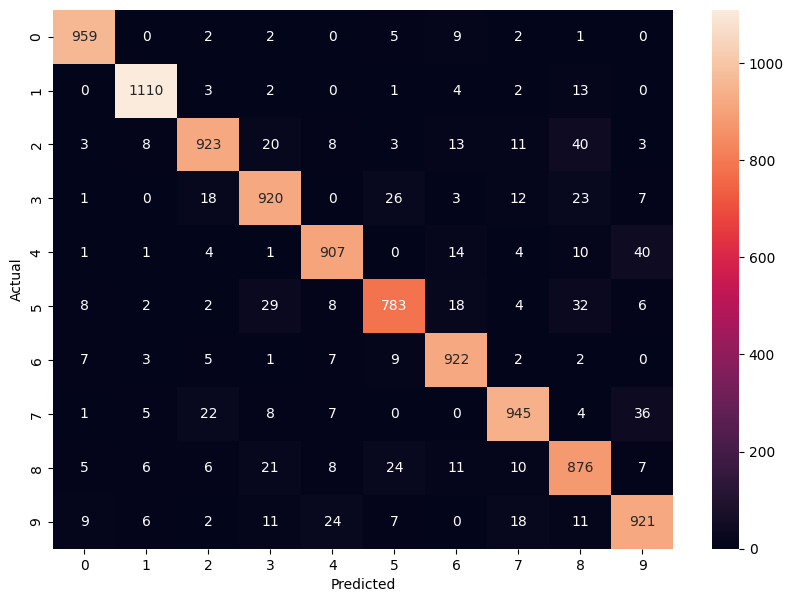

In [19]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [23]:
# now we build a neural network with hidden layers in between which will take the X_train_flattened data as input and try to predict which digit is it.
# by using hidden layers in between input and output layer, the model becomes more robust and accurate
# to this, we have keras library
model_with_hidden = keras.Sequential([
    keras.layers.Dense(100, input_shape= (784,), activation='relu'), #<----hidden layer
    keras.layers.Dense(10, activation='sigmoid')
])

model_with_hidden.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model_with_hidden.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 9s 4ms/step - loss: 0.2731 - accuracy: 0.9232
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1247 - accuracy: 0.9636
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0868 - accuracy: 0.9742
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0647 - accuracy: 0.9805
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0511 - accuracy: 0.9840


In [24]:
model_with_hidden.evaluate(X_test_flatten, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0803 - accuracy: 0.9751


[0.08033646643161774, 0.9750999808311462]

313/313 [==============================] - 1s 2ms/step


Text(95.72222222222221, 0.5, 'Actual')

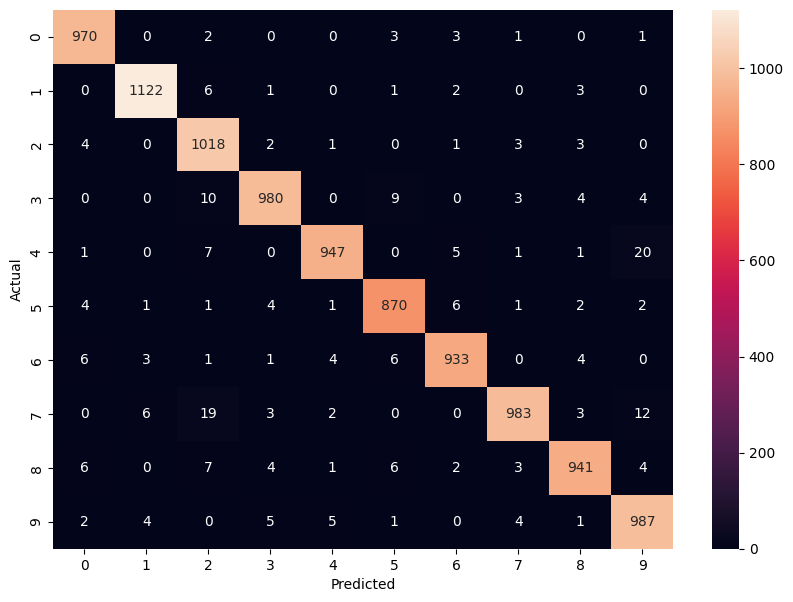

In [25]:
y_pred_hl = model_with_hidden.predict(X_test_flatten)
y_pred_labels_hl = [np.argmax(i) for i in y_pred_hl]
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_pred_labels_hl)

import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')